In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1

trainset = torchvision.datasets.ImageFolder(root='./imgs', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [20]:
transforms.ToTensor()

ToTensor()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [6]:
dir()

['_IterableDataset_len_called',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_base_seed',
 '_clean_up_worker',
 '_collate_fn',
 '_data_queue',
 '_dataset',
 '_dataset_kind',
 '_drop_last',
 '_get_data',
 '_index_queues',
 '_index_sampler',
 '_mark_worker_as_unavailable',
 '_next_data',
 '_next_index',
 '_num_workers',
 '_num_yielded',
 '_persistent_workers',
 '_pg',
 '_pin_memory',
 '_pin_memory_device',
 '_prefetch_factor',
 '_process_data',
 '_profile_name',
 '_rank',
 '_rcvd_idx',
 '_reset',
 '_sampler_iter',
 '_send_idx',
 '_shared_seed',
 '_shutdown',
 '_shutdown_workers',
 

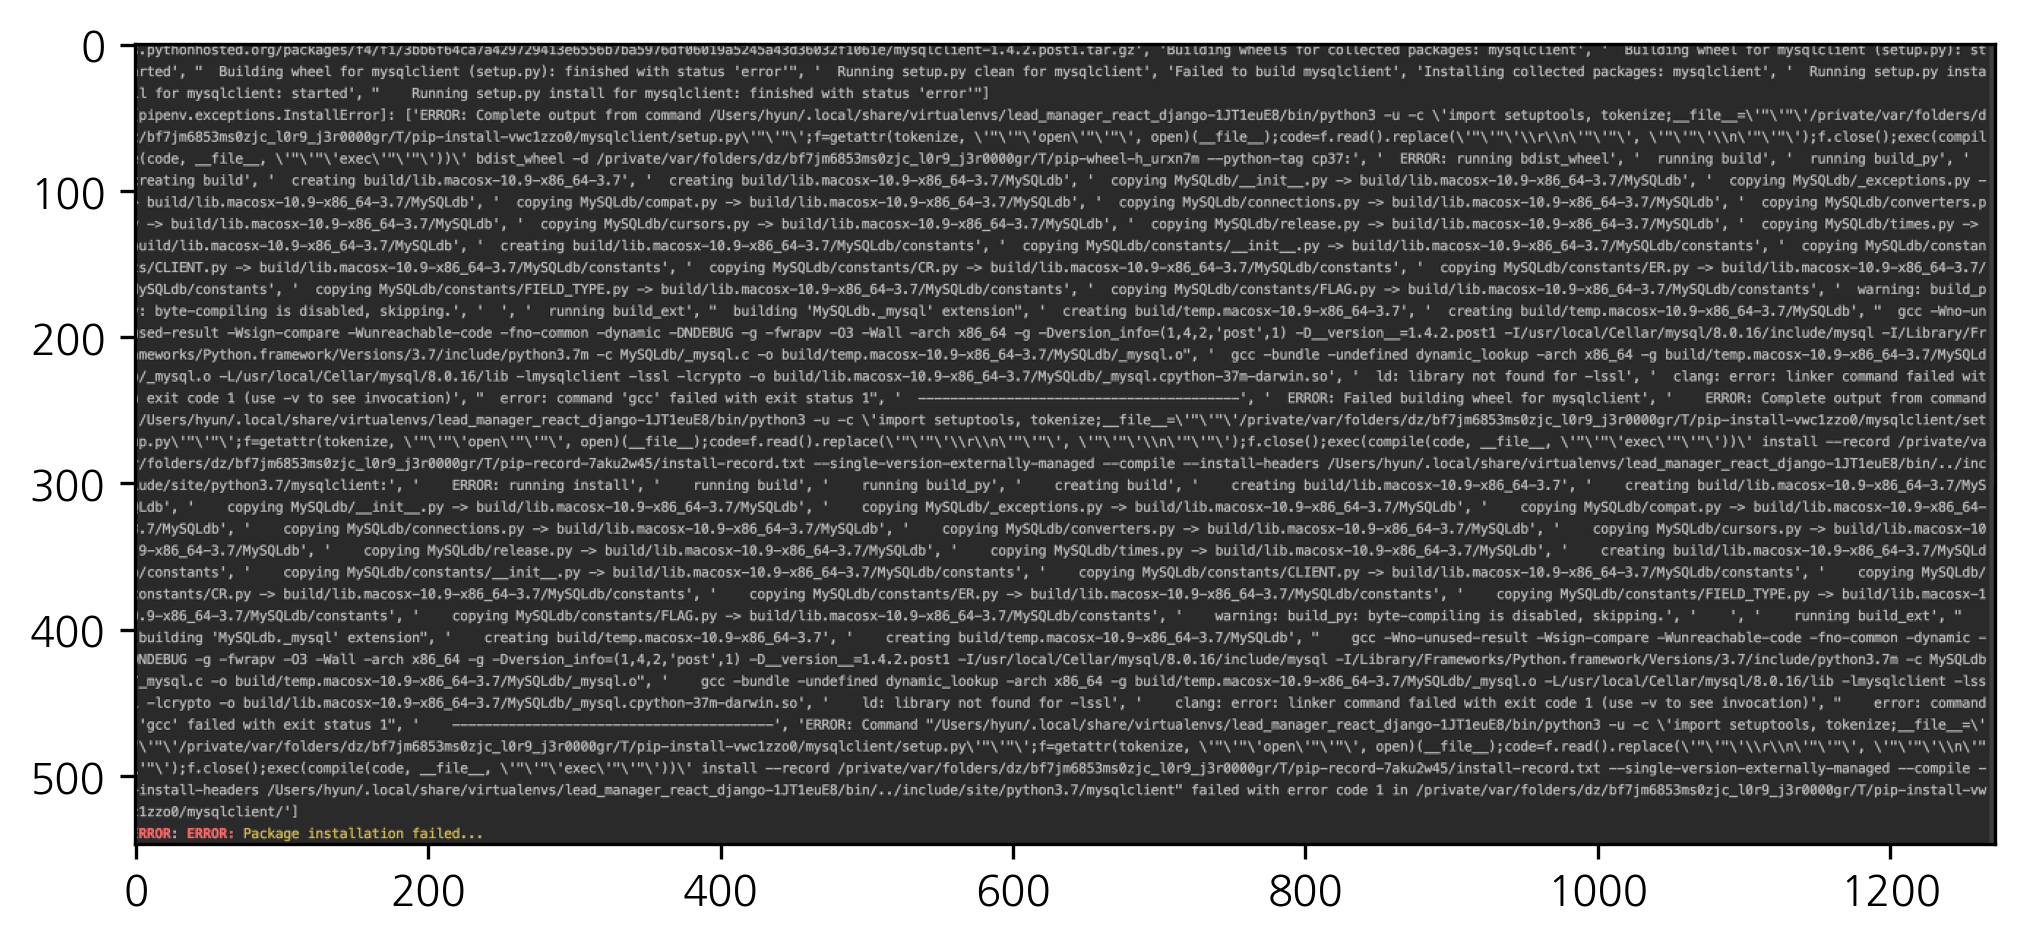

False


In [5]:
# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{trainset.classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 1

trainset = torchvision.datasets.ImageFolder(root='./imgs', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Load MobileNetV2 pre-trained on ImageNet
model = models.mobilenet_v2(pretrained=True)

# Modify the classifier to output binary predictions
num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 2),
    nn.Softmax(dim=1)
)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}")
            running_loss = 0.0

print("Training finished.")

ValueError: Target size (torch.Size([1])) must be the same as input size (torch.Size([1, 2]))

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.ImageFolder(root='./imgs', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


model = models.mobilenet_v2(pretrained=True)


num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 2),
    nn.Sigmoid()  # Use sigmoid activation for binary classification
)


criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


device = torch.device("cuda on" if torch.cuda.is_available() else "cpu")
model.to(device)


epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        inputs, labels = inputs.to(device), labels.to(device)

        # Convert labels to one-hot encoded format
        labels_one_hot = torch.zeros(labels.size(0), 2).to(device)
        labels_one_hot.scatter_(1, labels.unsqueeze(1), 1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        print(f"[{epoch + 1}, {i + 1}] loss: {running_loss}")
        running_loss = 0.0

print("Training finished.")


[1, 1] loss: 0.7495558261871338
[1, 2] loss: 0.6935336589813232
[2, 1] loss: 0.7462472915649414
[2, 2] loss: 0.6953379511833191
[3, 1] loss: 0.6946466565132141
[3, 2] loss: 0.7447397708892822
[4, 1] loss: 0.6910005807876587
[4, 2] loss: 0.7451660633087158
[5, 1] loss: 0.6879976987838745
[5, 2] loss: 0.7444998025894165
[6, 1] loss: 0.6856088638305664
[6, 2] loss: 0.7429690361022949
[7, 1] loss: 0.6838027238845825
[7, 2] loss: 0.7407857179641724
[8, 1] loss: 0.7381566762924194
[8, 2] loss: 0.6854192018508911
[9, 1] loss: 0.6857807636260986
[9, 2] loss: 0.7310813069343567
[10, 1] loss: 0.6845251321792603
[10, 2] loss: 0.728757381439209
Training finished.
